# Introducción al Proyecto

La compañía móvil Megaline está enfocada en optimizar su oferta de planes debido a la insatisfacción causada por el hecho de que muchos clientes todavía utilizan planes heredados. La importancia de este proyecto radica en la necesidad de ajustar los planes para asegurar que los usuarios estén completamente satisfechos con sus servicios, lo cual es crucial para mejorar la retención de clientes y maximizar los ingresos.

    Objetivo del Proyecto

El objetivo principal de este proyecto es desarrollar un modelo de clasificación que recomiende el plan más adecuado, ya sea Smart o Ultra, para satisfacer las necesidades de los clientes de Megaline. La empresa proporcionó datos sobre el comportamiento de sus suscriptores para llevar a cabo este análisis. Utilizaremos estos datos para evaluar el éxito del modelo, centrándonos en la capacidad del modelo para clasificar correctamente los planes de acuerdo con las características del usuario.

    Datos y Enfoque del Modelo

El conjunto de datos disponible incluye información sobre los suscriptores de Megaline, detallando en qué plan se encuentran actualmente. Los datos fueron proporcionados por la empresa y representan el comportamiento mensual de los clientes. El uso de modelos de clasificación es esencial en este contexto, ya que nos permite categorizar a los clientes en dos grupos: aquellos que se beneficiarían más del plan Smart y aquellos para quienes el plan Ultra sería más adecuado.

Aunque aún no se han decidido los modelos específicos a probar, el enfoque inicial es investigar diferentes algoritmos de clasificación para determinar cuál se adapta mejor a este conjunto de datos.

    Expectativas y Desafíos

Las expectativas para este proyecto incluyen proporcionar información relevante que permita a Megaline comprender qué plan se adapta mejor a sus clientes. Aunque aún estamos explorando qué modelos y métodos serán los más efectivos, anticipamos que el desafío principal será identificar el modelo que maximice la precisión y eficiencia de las recomendaciones.



In [1]:
#importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.dummy import DummyClassifier

#### PREPARACION DE DATOS

In [2]:
#se imprime el "df" para saber los tipos de datos
df =pd.read_csv("/datasets/users_behavior.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
#se verifican datos nulos (no contiene datos nulos)
df.isnull()

,calls,minutes,messages,mb_used,is_ultra
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3209,False,False,False,False,False
3210,False,False,False,False,False
3211,False,False,False,False,False
3212,False,False,False,False,False


In [4]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       calls  minutes  messages  mb_used  is_ultra
0     False    False     False    False     False
1     False    False     False    False     False
2     False    False     False    False     False
3     False    False     False    False     False
4     False    False     False    False     False
...     ...      ...       ...      ...       ...
3209  False    False     False    False     False
3210  False    False     False    False     False
3211  False    False     False    False     False
3212  False    False     False    False     False
3213  False    False     False    False     False

[3214 rows x 5 columns]>

In [5]:
#se revisa que no contenga datos duplicados (no contiene datos duplicados)
df.drop_duplicates()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [6]:
# estadistica descriptiva de cada columna como el promedio, mediana, desviación estándar, mínimo y máximo
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
#se trabaja con la columna "is_ultra" por lo que se hace un conteo de valores
df["is_ultra"].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [8]:
#enterenamiento de modelo usando "is_ultra"
X = df.drop(["is_ultra"], axis= 1)
y= df["is_ultra"]

In [9]:
#validación
#dividimos entre entrenamiento y temporalidad se deja el 70% de los datos para el entrenamiento, por lo que usaremos el 30% restante de los datos, que es ingual al 0.3
#se toma "random_state" al 42 al ser el número más usado por los demás programadores
X_train, X_temporalidad, y_train, y_temporalidad = train_test_split(X, y, test_size= 0.3 , random_state=42)

In [10]:
#prueba de validación, en el paso anterior usamos el 30% de los datos , aqui se divide ese 30%  a al mitad test_size=0.5 que seria el 15% para la "prueba" y el 15% para la "validación"
X_test , X_val, y_test, y_val = train_test_split(X_temporalidad, y_temporalidad, test_size=0.5, random_state= 42)

In [11]:
#se imprime la ferificación de la  división de datos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño de conjunto de valdación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (2249, 4)
Tamaño de conjunto de valdación: (483, 4)
Tamaño del conjunto de prueba: (482, 4)


In [12]:
#distribución de la variable
print("Distribución del conjunto de entrenamiento:", y_train.value_counts(normalize= True))
print("Distribución del conjunto de validación:", y_val.value_counts(normalize= True))
print("Distribución del conjunto de prueba:", y_test.value_counts(normalize= True))

Distribución del conjunto de entrenamiento: 0    0.697643
1    0.302357
Name: is_ultra, dtype: float64
Distribución del conjunto de validación: 0    0.660455
1    0.339545
Name: is_ultra, dtype: float64
Distribución del conjunto de prueba: 0    0.707469
1    0.292531
Name: is_ultra, dtype: float64


#### CONSTRUCUIÓN DE MODELO

In [13]:
#PRIMER MODELO DE REGRESIÓN LOGISTICA
#creacion de modelo
model = LogisticRegression(random_state= 42)

#entrenamiento de modelo
model.fit(X_train , y_train)

#prediccion del conjunto de validación
y_val_pred= model.predict(X_val)

#calcular la precisión
accuracy_val= accuracy_score(y_val, y_val_pred )
print("Precisión del conjunto de validación:", accuracy_val)

Precisión del conjunto de validación: 0.722567287784679


In [14]:
#predición del cojunto de prueba
y_test_pred= model.predict(X_test)
#calcular al predición
accuracy_test= accuracy_score(y_test, y_test_pred)

#predición 
print("precisión del conjunto de prueba:", accuracy_test)

precisión del conjunto de prueba: 0.7634854771784232


Regresión Logística muestra un buen desempeño, Sin embargo, no alcanza la precisión de Random Forest, por lo que se descarta.

In [15]:
#SEGUNDO MODELO RANDOM FOREST
#Creacion de modelo
model_rand_forest = RandomForestClassifier(n_estimators= 100, random_state=42 )

#entrenamiento del modelo
model_rand_forest.fit(X_train, y_train)

#predecir validación
y_val_pred_rand_forest= model_rand_forest.predict( X_val)

#calcular validación
accuracy_val_rand_forest= accuracy_score(y_val, y_val_pred_rand_forest)
print("precisión del conjunto de validación de forest:", accuracy_val_rand_forest)

precisión del conjunto de validación de forest: 0.7784679089026915


In [16]:
#conjunto de prueba
y_test_pred_rand_forest = model_rand_forest.predict(X_test)

#calcular predicisión de prueba
accuracy_test_rand_forest= accuracy_score(y_test, y_test_pred_rand_forest)
print("precisión de conjunto de prueba de forest:", accuracy_test_rand_forest)

precisión de conjunto de prueba de forest: 0.8278008298755186


Random Forest tiene el mejor rendimiento tanto en validación como en prueba. muestra un buen equilibrio entre complejidad y capacidad de generalización, por lo que seguiremos trabajando con esté modelo.

In [17]:
#TERCER MODELO ÁRBOL DE DECISIÓN

#cracion de modelo
model_tree_class= DecisionTreeClassifier(random_state= 42)

#entrenamiento
model_tree_class.fit(X_train, y_train)

#predicion de validación
y_val_pred_tree_class= model_tree_class.predict(X_val)

#calcular la validación
accuracy_val_tree_class = accuracy_score(y_val, y_val_pred_tree_class )
print("Precisión del conjunto de validación del Árbol de Decisión:", accuracy_val_tree_class)

Precisión del conjunto de validación del Árbol de Decisión: 0.7142857142857143


In [18]:
#calcular precisión de prueba
y_test_pred_tree_class= model_tree_class.predict(X_test)

#calcular predición de prueba
accuracy_tree_class= accuracy_score(y_test, y_test_pred_tree_class)
print("Precisión del conjunto de Árbol de Decisión:", accuracy_tree_class)

Precisión del conjunto de Árbol de Decisión: 0.7282157676348547


Árbol de Decisión tiene el rendimiento más bajo en este caso, no parecen capturar el problema tan efectivamente como Random Forest, por lo que se descarta esté modelo.

#### EVALUACIÓN DEL MODELO

In [19]:
# MODELO RANDOM FOREST al ser mejor modelo, seguiremos trabajando con el implementando más ajustes.
#Creacion de modelo
model_rf = RandomForestClassifier(random_state=42)

#hiperparametros
param_grid = {
    #número de arboles 
    "n_estimators": [50, 100, 150],
    
    #profundida maxima del árbol
    "max_depth": [5, 10, None],
    
    #muestra minima requeridas para dividir
    "min_samples_split": [2, 5],
    
    #muesta minima requerida en una hojas
    "min_samples_leaf": [1,2]
    }

#configuración de GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

#busqueda de conbinación de hiperparametros
grid_search.fit(X_train, y_train)

#  parámetros y modelo
print("Mejores parámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


interpretación de losdatos:

5 folds: configuración de hiperparámetros fue entrenada y validada 5 veces.
    
36 candidates: Se evaluaron 36 combinaciones diferentes de hiperparámetros.
    
180 fits: 180 ajustes de modelos diferentes.
    
max_depth: 10: La profundidad máxima de los árboles es 10 niveles.
        
min_samples_leaf: Cada hoja debe tener al menos 2 muestras.
    
min_samples_split: 2 - Se requieren al menos 2 muestras para dividir un nodo interno.

n_estimators: 50 - El bosque está compuesto por 50 árboles.

In [20]:
# evaluar el conjunto de prueba
y_test_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Precisión en el conjunto de prueba:", accuracy_test)

Precisión en el conjunto de prueba: 0.8278008298755186


El modelo es capaz de predecir correctamente el 82.78% de las instancias en el conjunto de prueba.

In [21]:
#validación cruzada
model= RandomForestClassifier(n_estimators= 100, max_depth= 10., random_state= 42)

#Realizar validación
scores= cross_val_score(model, X, y, cv=10, scoring= "accuracy")

#imprimir validación cruzada
print("Presición de cada fold:", scores)
print("Media de la presición:", scores.mean())
print("Desviación estándar de la presición:", scores.std())


Presición de cada fold: [0.81677019 0.8136646  0.76397516 0.80745342 0.8317757  0.80685358
 0.80373832 0.81619938 0.81931464 0.82554517]
Media de la presición: 0.8105290145314527
Desviación estándar de la presición: 0.01752533731988047


Precisión de cada fold: Esto muestra la precisión obtenida en cada una de las 10 particiones del conjunto de datos.

Media de la precisión: 0.8105 aproximadamente, esto indica que en promedio, el modelo tiene un 81.05% de precisión.

Desviación estándar de la precisión: 0.0175 aproximadamente, es relativamente bajo, sugiriendo que el modelo es estable y consistente a través de diferentes conjuntos de datos.

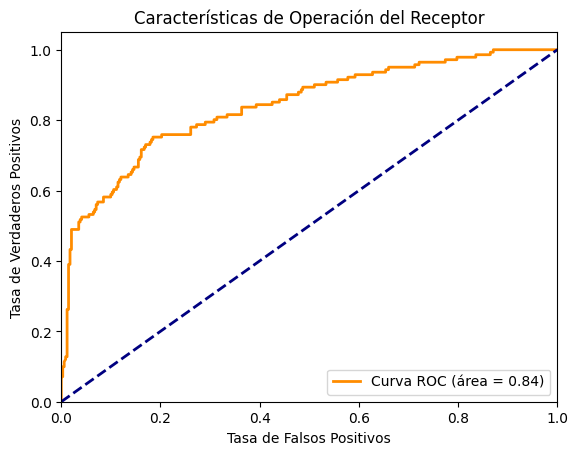

In [22]:
#curva ROC
#  entrenar modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# clase positiva
y_scores = model.predict_proba(X_test)[:, 1]

# Curva de ROC
fpr, tpr, umbrales = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Gráfica de curva de ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Características de Operación del Receptor")
plt.legend(loc="lower right") 
plt.show()


Se utiliza la curva ROC para evaluar un modelo de clasificación binaria.

La curva ROC tiene una buena separación entre las tasas de verdaderos y falsos positivos, con un área bajo la curva (AUC) de 0.84, lo cual indica un buen rendimiento del modelo en diferenciar entre las clases.

#### ANALISIS DE IMPORTANCIA DE CARACTERISTICAS

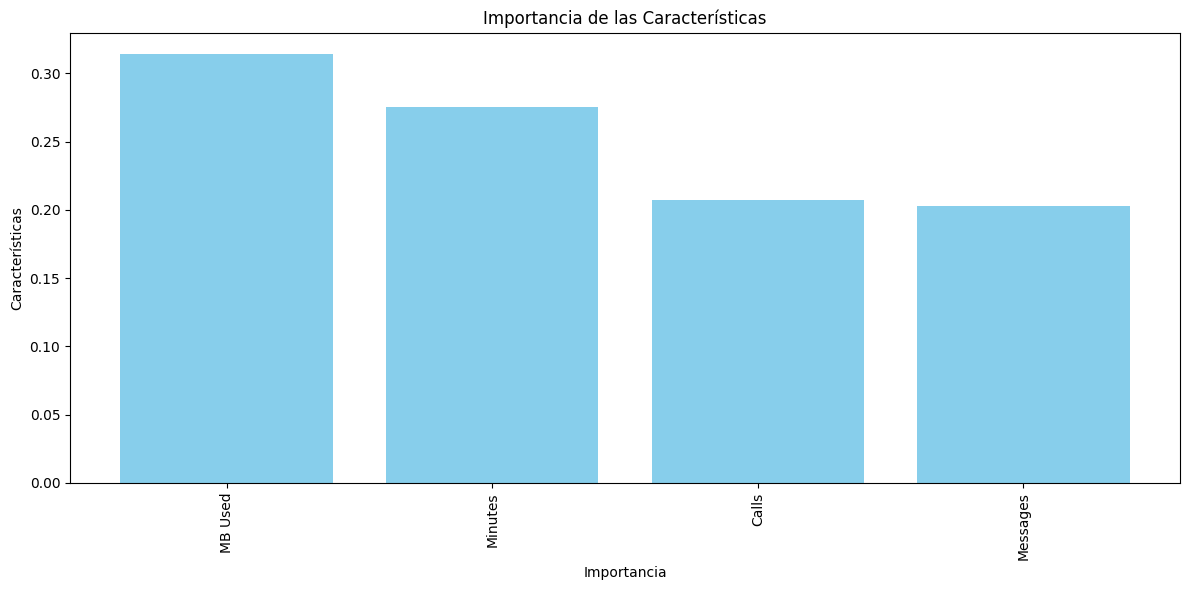

In [23]:
# nombres de las características que tiene mas peso en el modelo
feature_labels = ['Calls', 'Minutes', 'Messages', 'MB Used', 'Plan Type']

# modelo de RandomForest ya entrenado
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]  # ordenar importancias

# crear el gráfico
plt.figure(figsize=(12, 6))
plt.title('Importancia de las Características')
plt.bar(range(len(importances)), importances[indices], color='skyblue', align='center')
plt.xticks(range(len(importances)), [feature_labels[i] for i in indices], rotation=90)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()


MB Used: Esta característica tiene la mayor importancia en el modelo. Esto sugiere que el uso de datos móviles determina si un usuario elige el plan Ultra o Smart.

Minutes: La duración de las llamadas también es significativo, aunque tiene un poco menos de importancia que el uso de MB.

Calls: El número de llamadas parece ser menos importante que los minutos y el uso de MB.

Messages: Tiene la menor importancia de las características mostradas. Esto puede indicar que la cantidad de mensajes no influye tanto en la elección del plan como los otros factores.

#### VISUALIZACIÓN DE MODELO

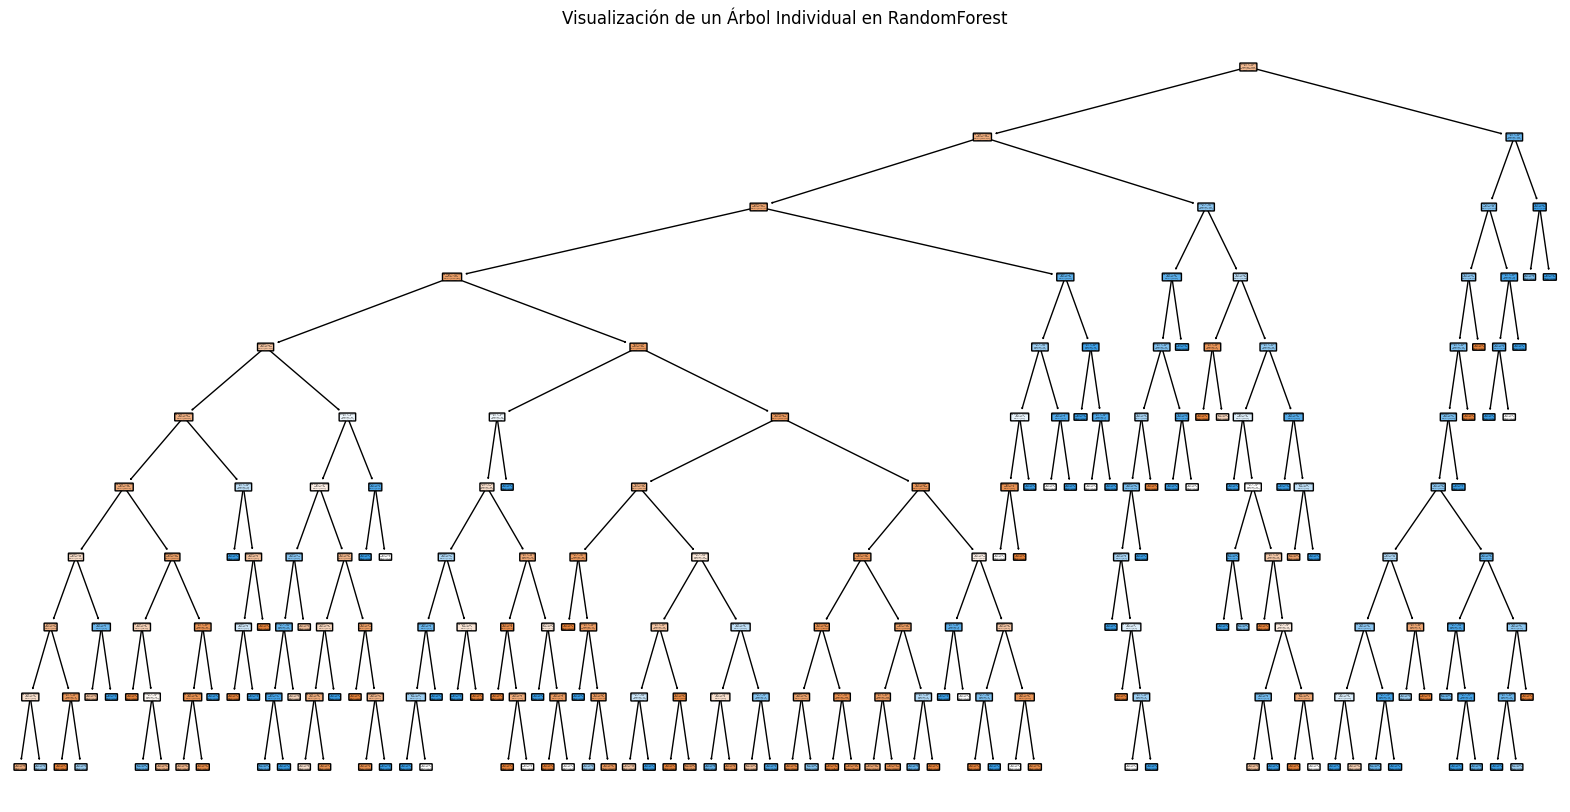

In [24]:
#'best_model' es  RandomForest entrenado
tree_in_forest = best_model.estimators_[0]  # Selección del primer árbol

#tamaño del gráfico
plt.figure(figsize=(20, 10))  
plot_tree(tree_in_forest, filled=True, feature_names=['Calls', 'Minutes', 'Messages', 'MB Used'], 
          class_names=['Smart', 'Ultra'],  
          rounded=True, proportion=False, 
          precision=2)
plt.title('Visualización de un Árbol Individual en RandomForest')
plt.show()


#### PRUEBA DE CORDURA

In [25]:
#creación de modelo Dummy
dummy_model= DummyClassifier(strategy= "most_frequent", random_state= 42)

#entrenamineto de modelo
dummy_model.fit(X_train, y_train)

#predictión
dummy_pred= dummy_model.predict(X_test)

#exactitud
dummy_accuracy= accuracy_score(y_test, dummy_pred )
print("Exactitud de modelo Dummy:",dummy_accuracy )

Exactitud de modelo Dummy: 0.7074688796680498


Modelo Random Forest:

    Conjunto de validación: 0.7785
    Conjunto de prueba: 0.8278

Modelo Dummy:

    Exactitud: 0.7075
 
El modelo Random Forest funciona mejor que el modelo Dummy, alcanzando una exactitud del 82.78%, esta diferencia sugiere que el modelo RandomForest está funcionando adecuadamente y supera el umbral de exactitud del 75% establecido para el proyecto

# CONCLUSIÓN

Se desarrolló el modelo Random Forest para la compañía Megaline, alcanzando una exactitud de 82.78% en el conjunto de prueba y 77.85% en el conjunto de validación, superando el umbral establecido por la compañía del 75%.

MB Used: Nos permite comprender que los usuarios muestran una mayor importancia en los datos móviles, lo cual es clave en la elección entre los planes Ultra y Smart. Esto puede indicar que los usuarios con alto consumo de datos tienden a preferir el plan Ultra.

Minutos: Refleja la cantidad de tiempo que los usuarios pasan hablando, este indicador también influye en su elección de plan.

Por otro lado, las Llamadas y Mensajes tienen un peso menor en comparación con el uso de datos y los minutos a la hora de determinar la preferencia de plan.

    Recomendaciones basadas en los datos encontrados:

Promociones Basadas en Datos: Utilizar los datos para lanzar promociones dirigidas durante eventos especiales. Por ejemplo, ajustar los límites de datos o la cantidad de minutos incluidos podría hacer que un plan sea más atractivo para segmentos específicos de usuarios.

Megaline podría considerar mejorar sus servicios de datos o ajustar los precios de los planes para capturar una mayor parte del mercado, mediante la optimización de los recursos y asignación de red, asegurando una experiencia de calidad para los clientes, aumentando la retención de usuarios y de esa forma, reducir la rotación o cancelación de planes.
